## Breast Cancer Diagnosis Using Deep Learning

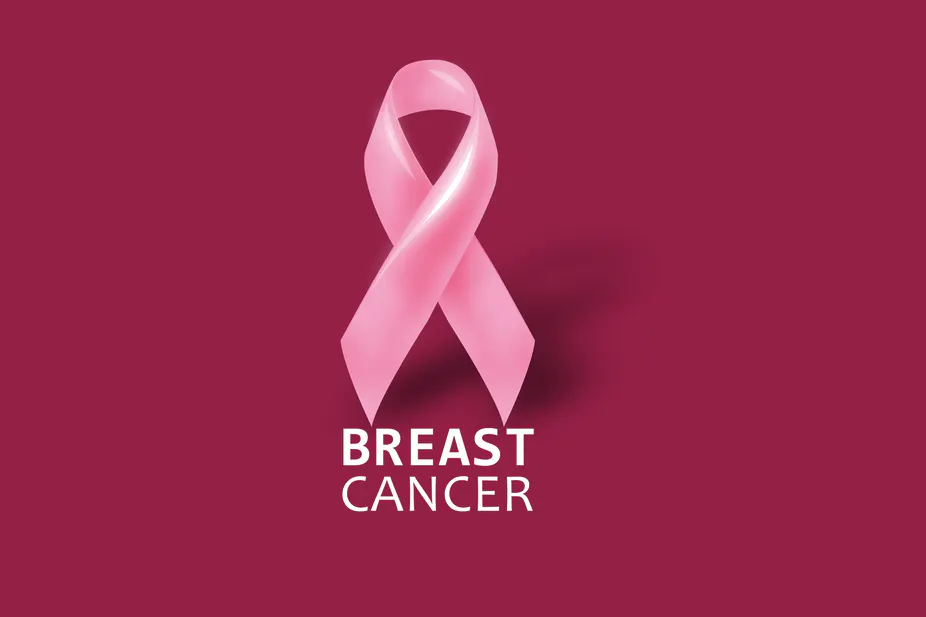

# About the Notebook
### Breast cancer is a disease in which cells in the breast grow out of control.Breast Cancer is one of the most common cancer diagnosed in women.

## Import libraries

In [1]:
# Import all the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings library and ignore all warnings
import warnings
warnings.filterwarnings('ignore')

#tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

#sklearn Libraries
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

<div class="alert alert-block alert-info">

## Read data into dataframes
    
</div>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/MachineLearningProjects/BreastCancerDiagnosis/

/content/drive/MyDrive/MachineLearningProjects/BreastCancerDiagnosis


In [4]:
#Loading the data file using pandas library
cancer_dataset = load_breast_cancer()
data = pd.read_csv('data/data.csv', sep = ",")

In [5]:
type(cancer_dataset)

sklearn.utils._bunch.Bunch

In [6]:
# keys in dataset
cancer_dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer_dataset['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
# Features name of malignant & benign tumor.
# name of features
print(cancer_dataset['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


<div class="alert alert-block alert-info">

### Exploratory Data Analysis (EDA)
#### Data Exploration



</div>

In [9]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
data.tail(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [11]:
data.shape

(569, 33)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<div class="alert alert-block alert-info" text-align='justify'>

## Data Cleaning
<p>Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
<p>When combining multiple data sources, there are many opportunities for data to be duplicated or mislabeled. If data is incorrect, outcomes and algorithms are unreliable, even though they may look correct.
<p>There is no one absolute way to prescribe the exact steps in the data cleaning process because the processes will vary from dataset to dataset.
<p>But it is crucial to establish a template for your data cleaning process so you know you are doing it the right way every time.
<p></br></p>    
</div>

<Axes: >

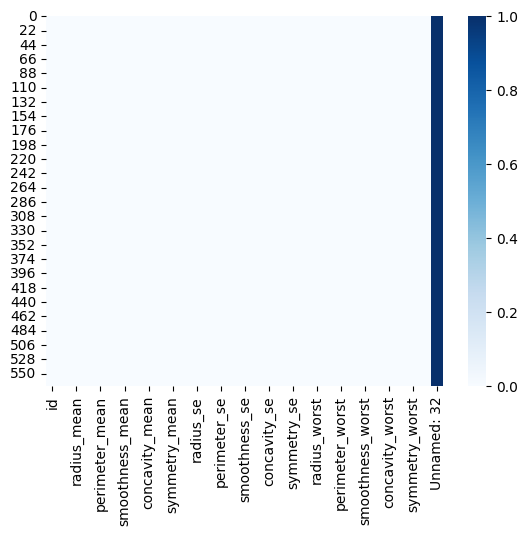

In [14]:
#Heatmap for all null values
sns.heatmap(data.isnull(),cmap='Blues')

In [15]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

<div class="alert alert-block alert-info">

<p><b> Check And Remove Duplication

</div>

In [16]:
print (data.duplicated().any() )

False


In [17]:
data = data.dropna(axis = 1)

In [18]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

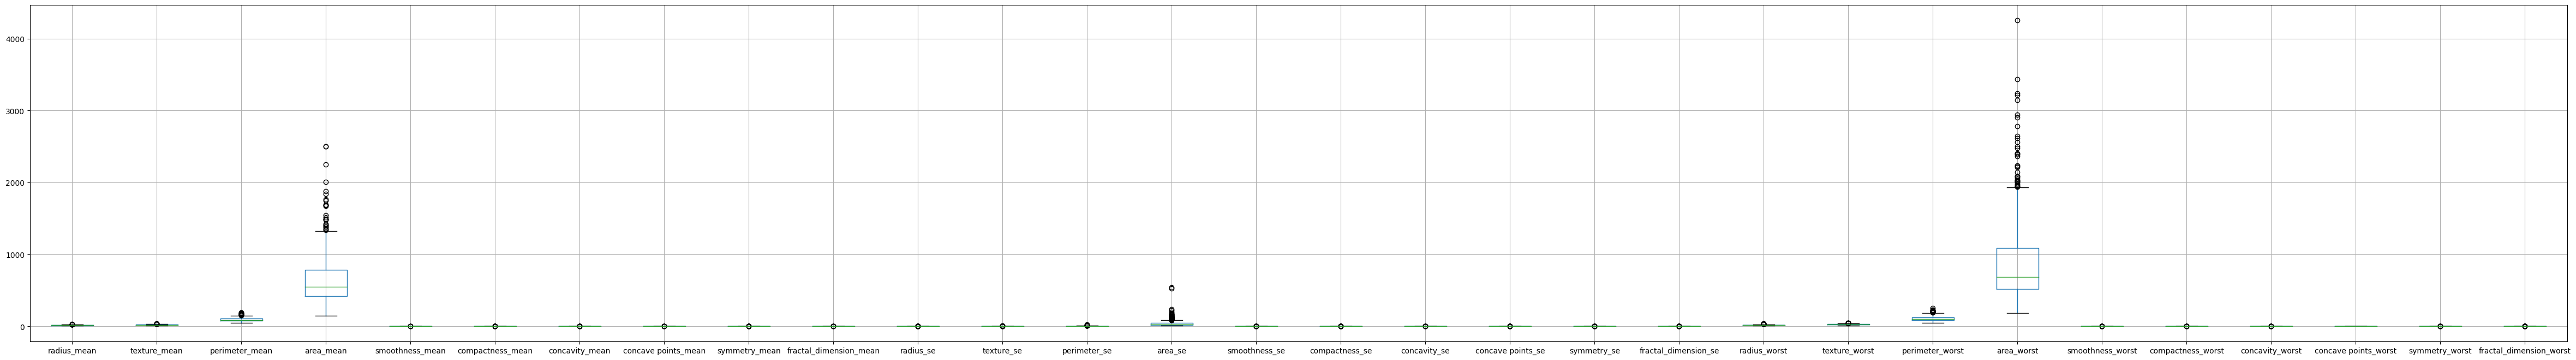

In [19]:
plt.figure(figsize=(60,8))
dataCheck = data.drop('id', axis=1)
dataCheck.boxplot()

<Axes: >

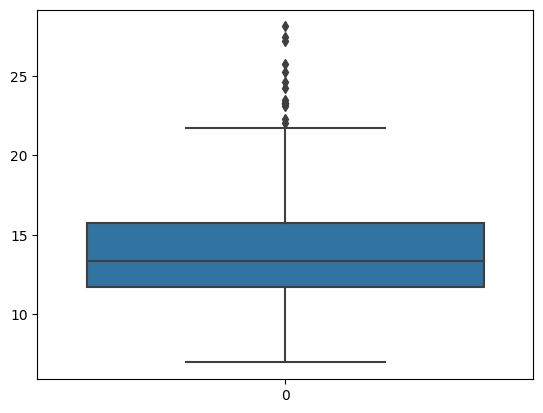

In [20]:
sns.boxplot(data['radius_mean'])


<Axes: >

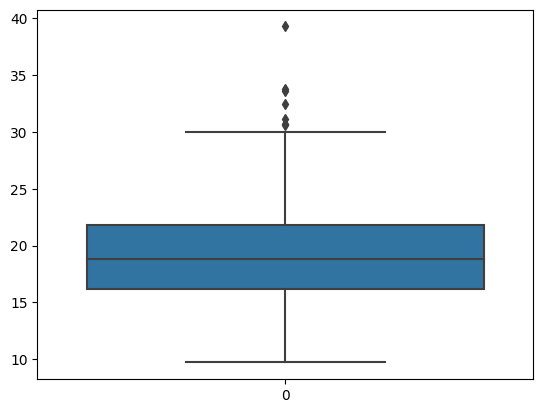

In [21]:
sns.boxplot(data['texture_mean'])


<Axes: >

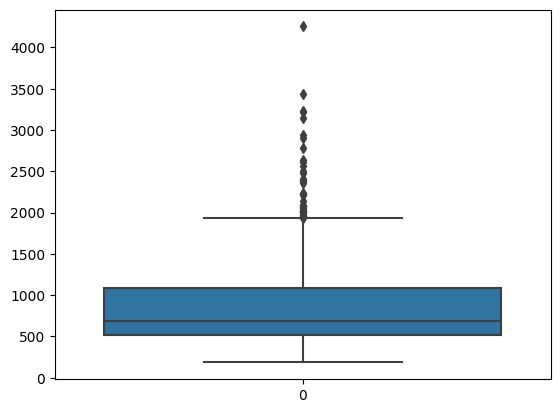

In [22]:
sns.boxplot(data['area_worst'])


<Axes: >

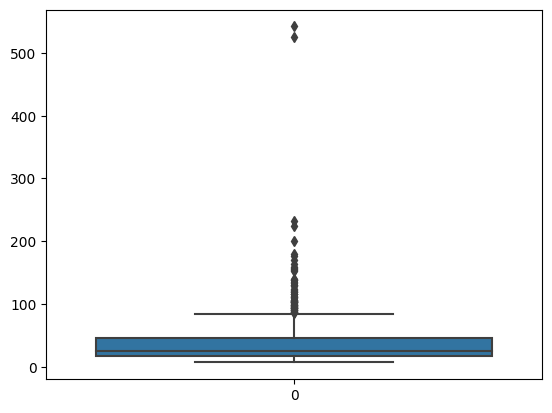

In [23]:
sns.boxplot(data['area_se'])


In [24]:
dataOriginal = data.copy()

In [25]:
data = data[(data['radius_mean'] < 23) & (data['texture_mean'] < 33) & (data['area_worst'] < 2300) & (data['area_se'] < 150)]

<div class="alert alert-block alert-info">

## Visualising the Data
### Visulaising the Features of the Data
</div>

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

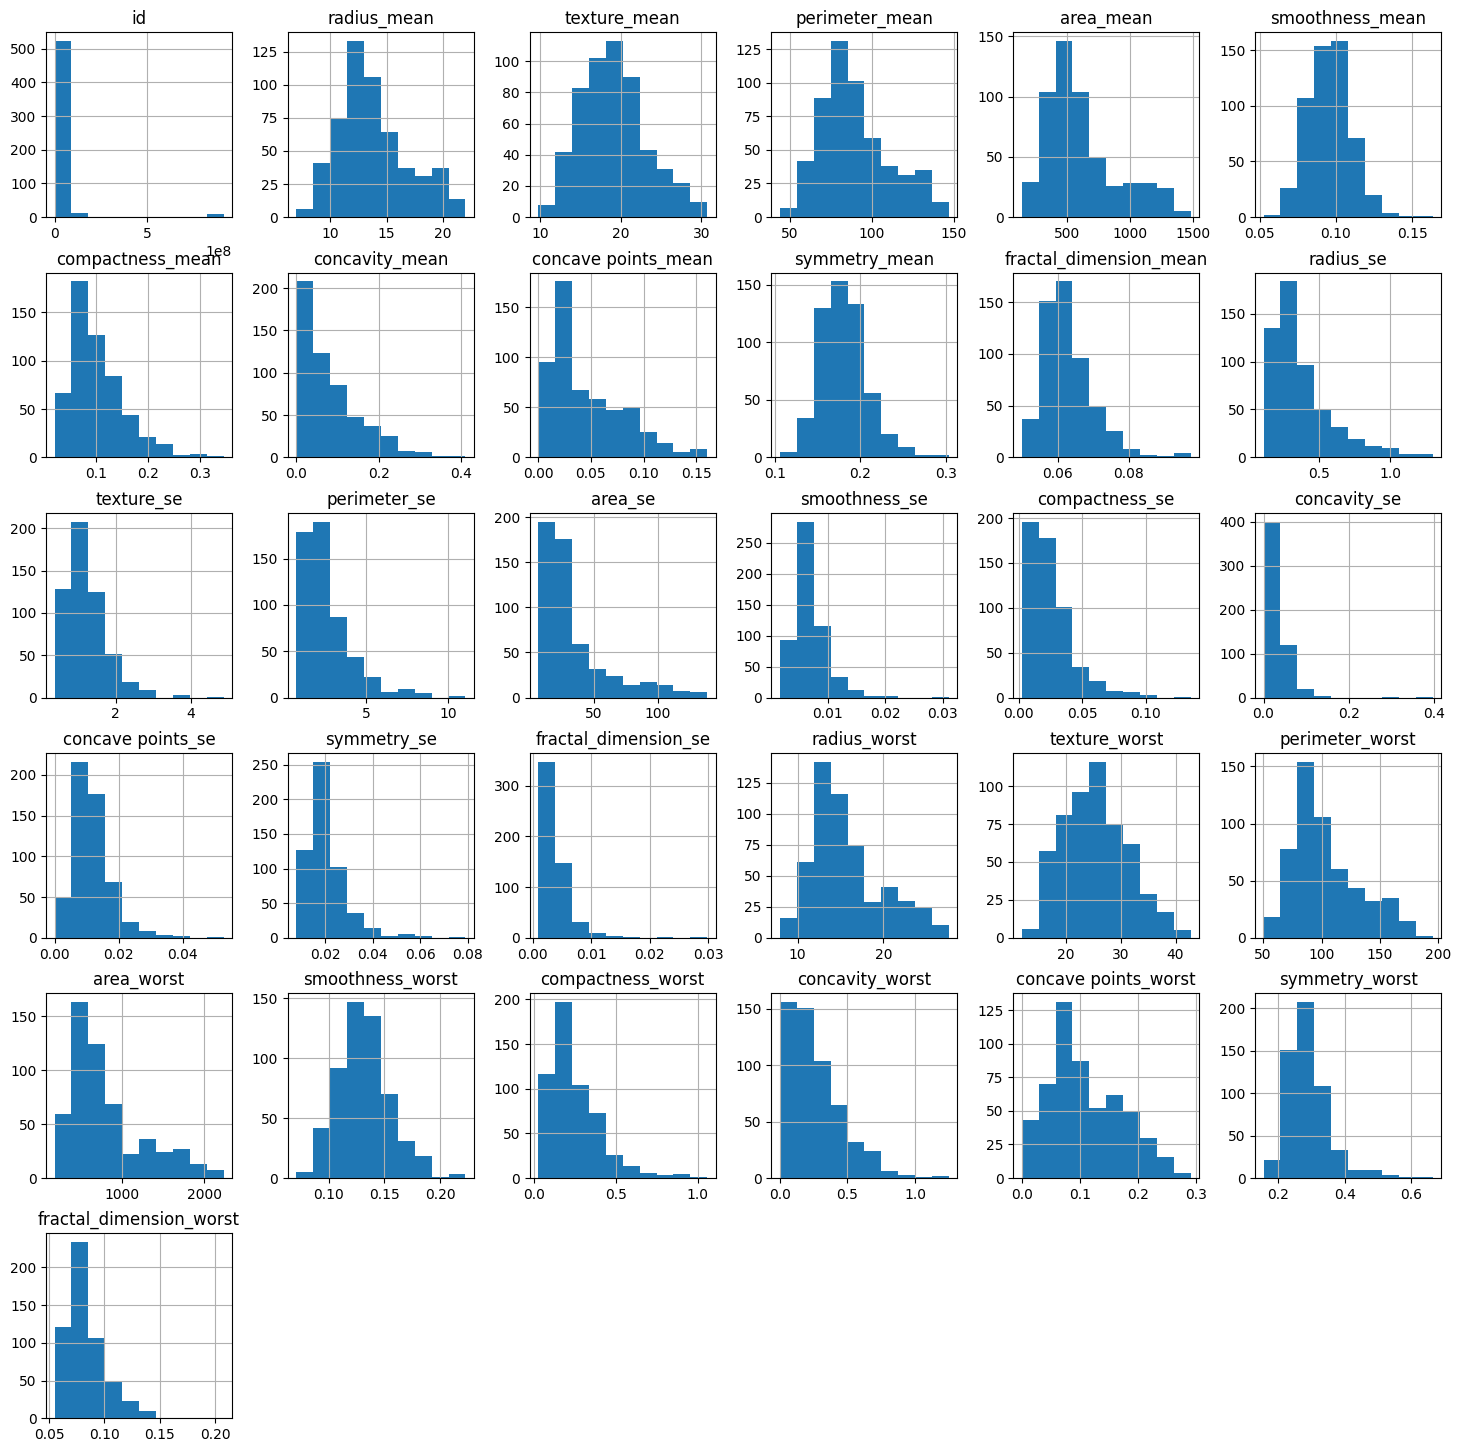

In [26]:
data.hist(figsize = (18,18))

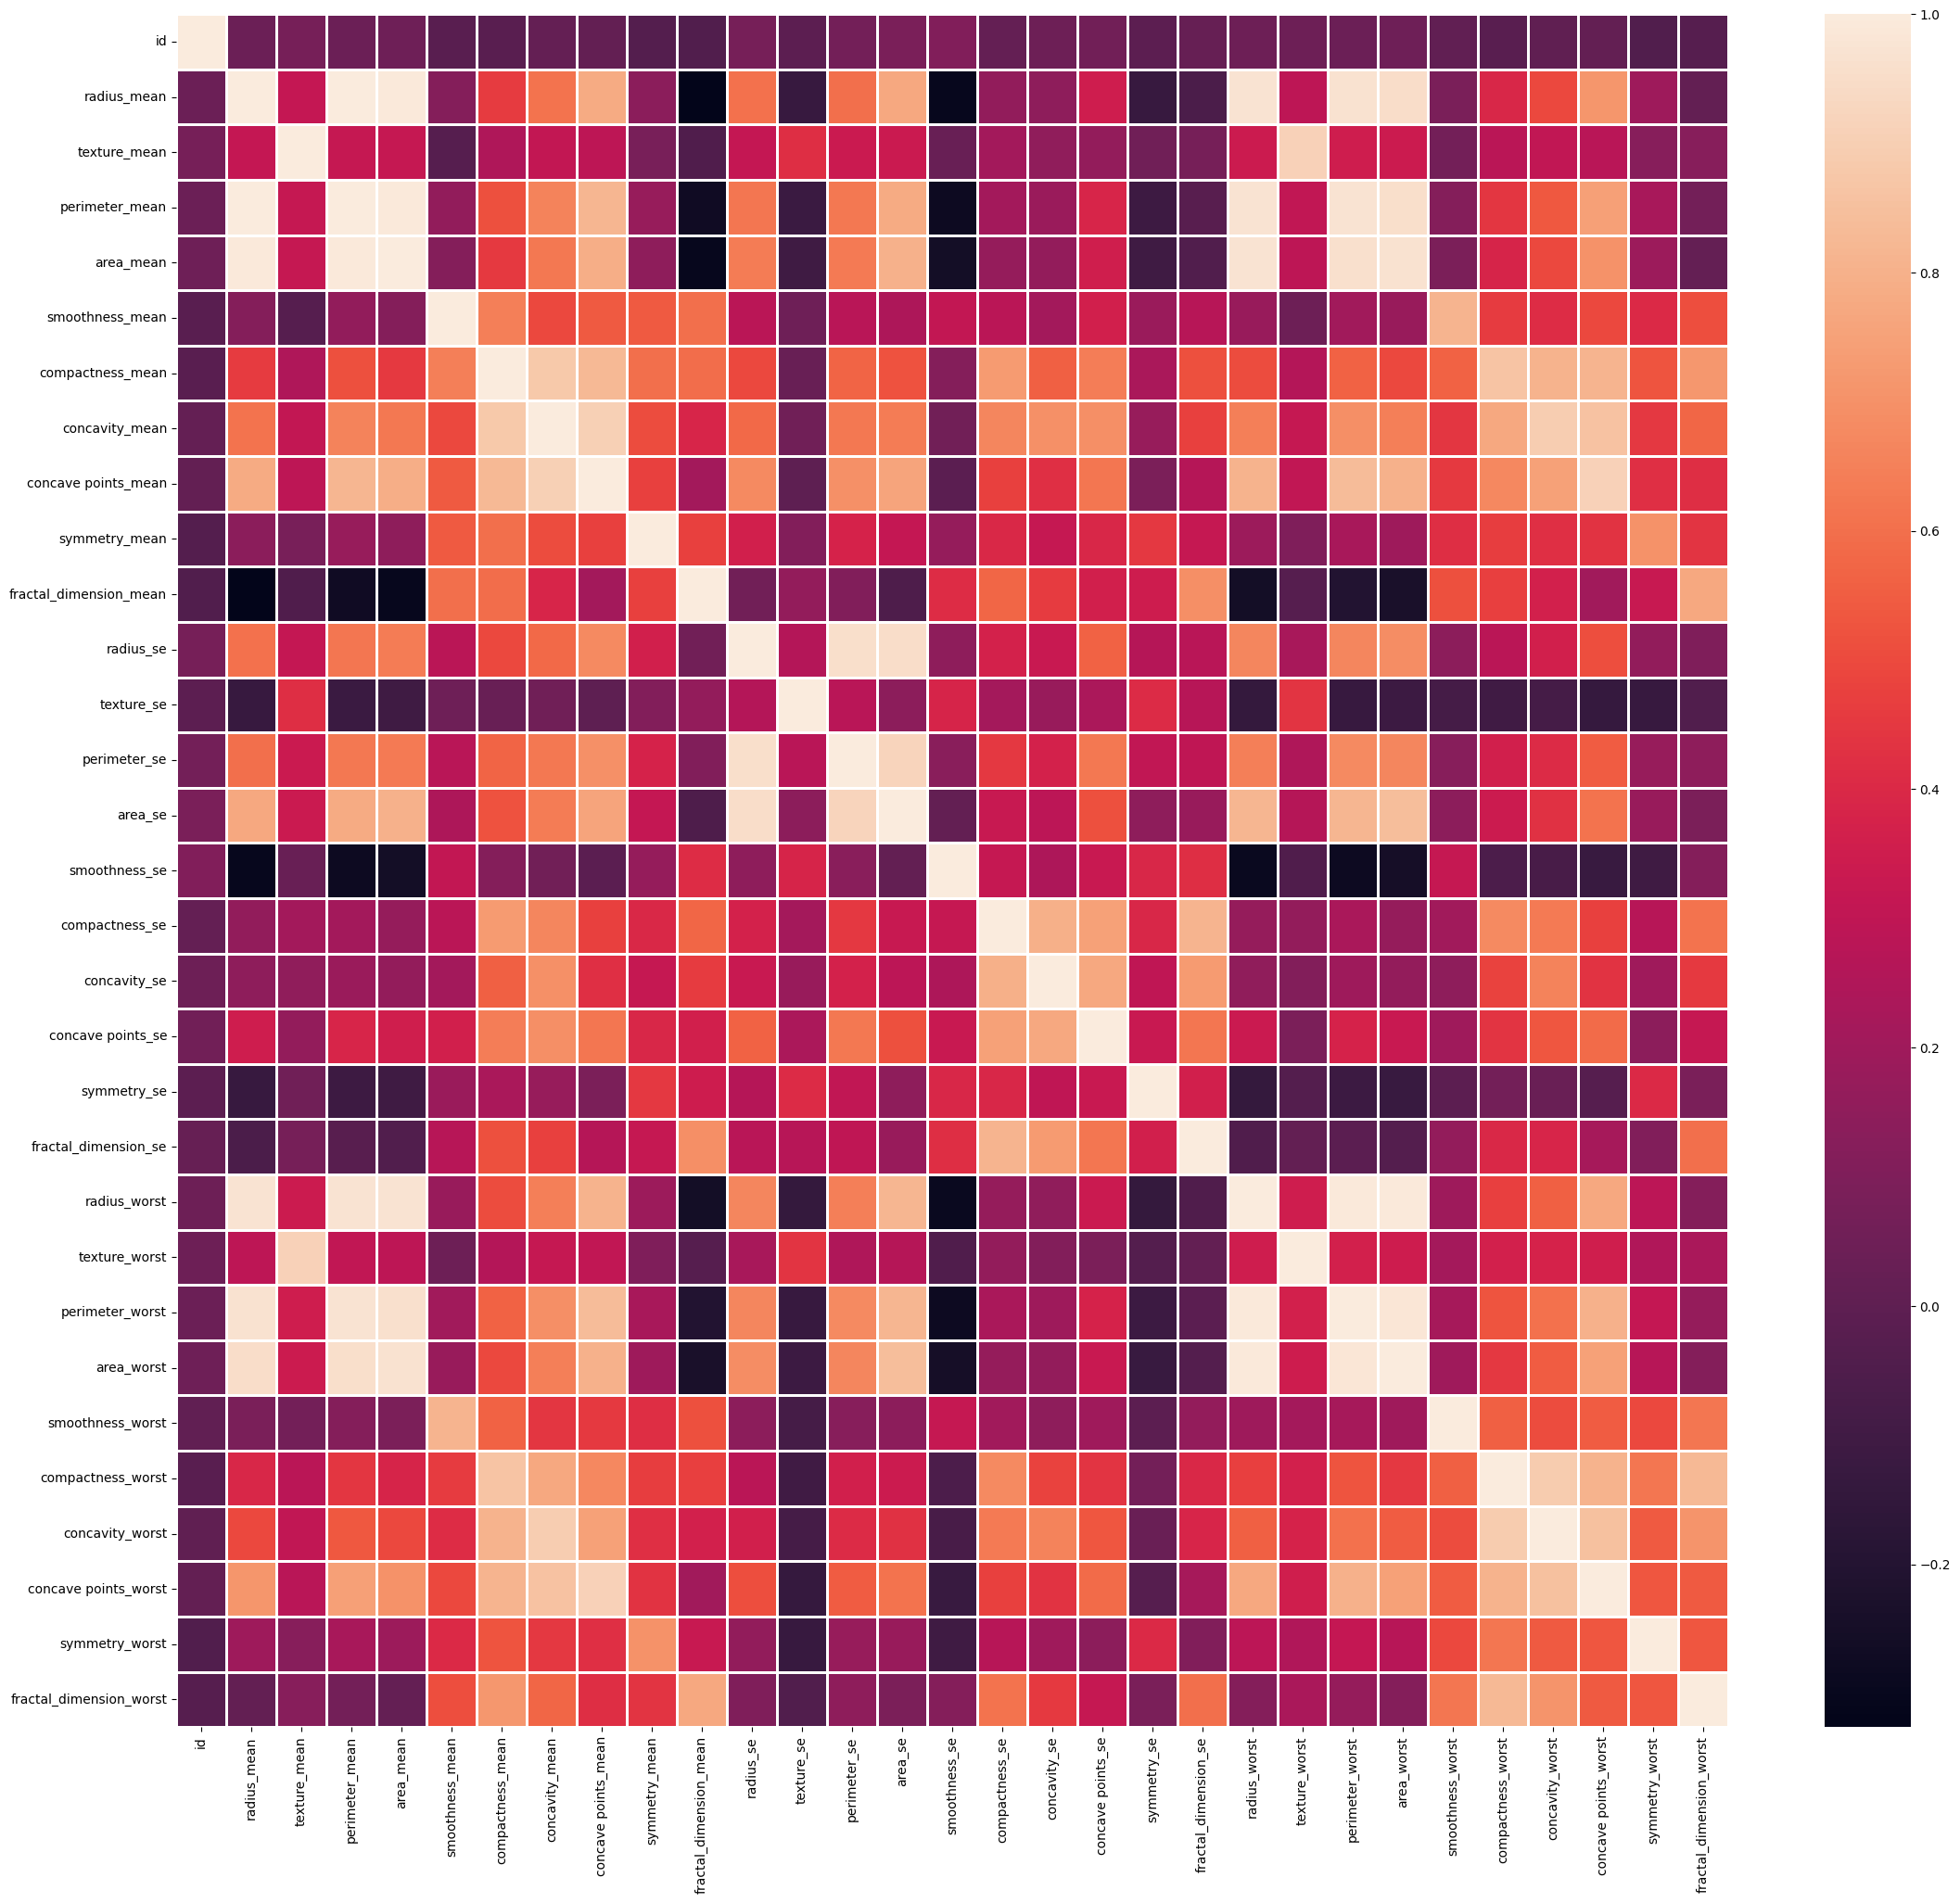

In [27]:
# Plotting a heatmap/correlation plot to see how different values are related to each other
plt.figure(figsize=(27,24))
sns.heatmap(data.corr(),annot=False,linewidths=2)
plt.show()

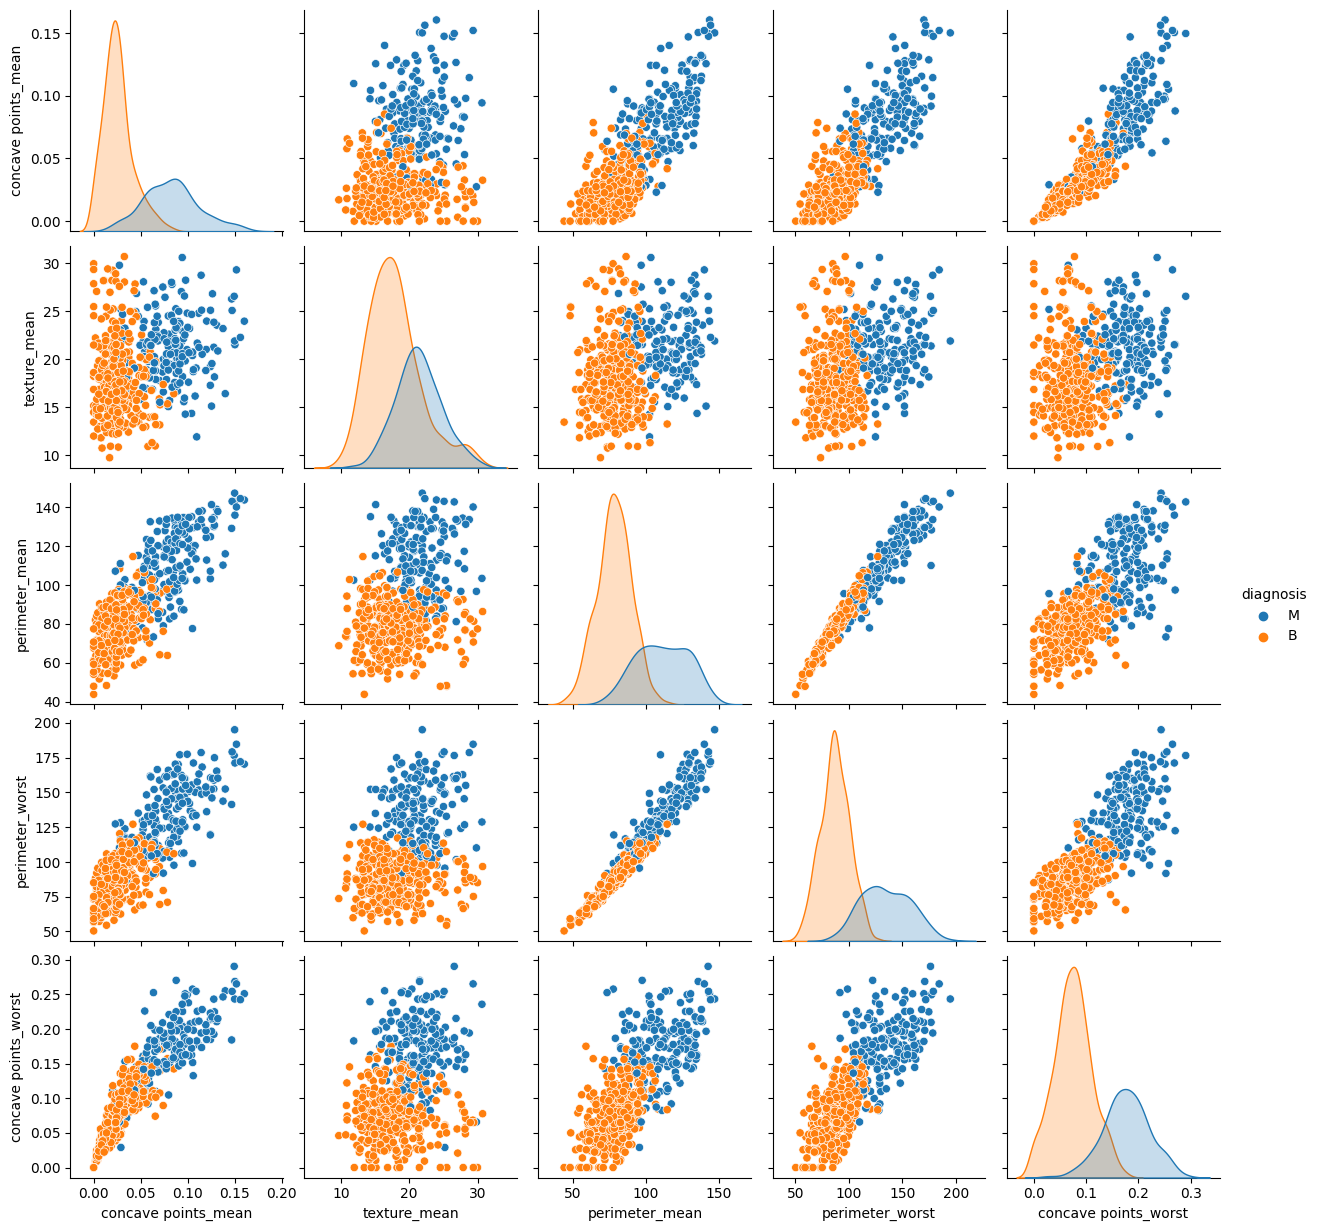

In [28]:
sns.pairplot(data, hue="diagnosis", vars=["concave points_mean", "texture_mean", "perimeter_mean", "perimeter_worst", "concave points_worst"])
plt.show()

In [29]:
# Showing the total count of malignant and benign tumor patients in counterplot.

n = data.diagnosis
B, M = n.value_counts()
# ax = sns.countplot(n,label="Count",palette="viridis")
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  356
Number of Malignant :  188


<div class="alert alert-block alert-danger">
<h3> Prepearing Data for ML </h3>
<p>
We need to convert our diagnostic values to numerical values in order to be able to process.
</div>


In [30]:
# Encoding our diagnostics using label encoder
Label_Encoder = LabelEncoder()
data['diagnosis']=Label_Encoder.fit_transform(data['diagnosis'])

In [31]:
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
498,914769,1,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,...,22.75,22.88,146.40,1600.0,0.1412,0.3089,0.3533,0.16630,0.2510,0.09445
34,854039,1,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,...,20.21,27.26,132.70,1261.0,0.1446,0.5804,0.5274,0.18640,0.4270,0.12330
279,8911834,0,13.85,15.18,88.99,587.4,0.09516,0.07688,0.04479,0.03711,...,14.98,21.74,98.37,670.0,0.1185,0.1724,0.1456,0.09993,0.2955,0.06912
408,90524101,1,17.99,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,...,21.08,25.41,138.10,1349.0,0.1482,0.3735,0.3301,0.19740,0.3060,0.08503
196,875938,1,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,...,16.39,34.01,111.60,806.9,0.1737,0.3122,0.3809,0.16730,0.3080,0.09333


In [32]:
data.shape

(544, 32)

In [33]:
# Get only Malignant data
MalignantData = data[data.diagnosis==1]
MalignantData.shape

(188, 32)

In [34]:
# Get only Benign data
BenignData = data[data.diagnosis==0]
BenignData.shape

(356, 32)

In [35]:
# Get 212 record of this data for Balancing
BenignData = BenignData[0:188]
BenignData.shape

(188, 32)

In [36]:
#Simple Balancing by appending this two data
BreastCancerData = MalignantData.append(BenignData, ignore_index = True)
BreastCancerData
BreastCancerData = shuffle(BreastCancerData)

In [37]:
# Splitting our dataset into train-test split

X = BreastCancerData.drop(["diagnosis", "id"],axis=1)
y = BreastCancerData.diagnosis.values

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,shuffle=True, random_state = 42)

In [38]:
X_train.sample(3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
98,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.3327,0.12520,0.3415,0.09740
245,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,...,12.32,22.02,79.93,462.0,0.1190,0.1648,0.1399,0.08476,0.2676,0.06765
179,19.89,20.26,130.50,1214.0,0.10370,0.13100,0.14110,0.09431,0.1802,0.06188,...,23.73,25.23,160.50,1646.0,0.1417,0.3309,0.4185,0.16130,0.2549,0.09136


In [39]:
y_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [40]:
#Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

## Decision Tree Classifier

In [41]:
DecisionTreeModel = DecisionTreeClassifier(random_state = 42)   #building our model
DecisionTreeModel.fit(X_train,y_train)       #training our model

y_pred_dt = DecisionTreeModel.predict(X_test)

print("accuracy of Decision Tree Classifier : {}".format(accuracy_score(y_test, y_pred_dt)))

accuracy of Decision Tree Classifier : 0.8947368421052632


In [42]:
DecisionTreeModel = DecisionTreeClassifier(random_state = 42)   #building our model
DecisionTreeModel.fit(X_train_scaled,y_train)       #training our model

y_pred_dt_sc = DecisionTreeModel.predict(X_test_scaled)

print("accuracy of Decision Tree Classifier : {}".format(accuracy_score(y_test, y_pred_dt_sc)))

accuracy of Decision Tree Classifier : 0.8947368421052632


In [43]:
dt_accuracy_score = accuracy_score(y_test, y_pred_dt_sc)

In [44]:
print("Decision Tree Classification Report:\n",classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        38
           1       0.89      0.89      0.89        38

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



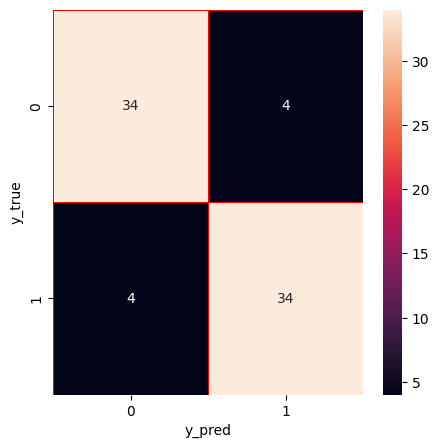

In [45]:
#Plotting a confusion matrix for checking the performance of our model

cm = confusion_matrix(y_test, y_pred_dt )

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Support Vector Classifier SVC

In [46]:
SVCModel = SVC(random_state = 42)   #We are building our model
SVCModel.fit(X_train,y_train)      #We are training our model
y_pred_svc = SVCModel.predict(X_test)
print("accuracy of SVC : {}".format(accuracy_score(y_test, y_pred_svc)))

accuracy of SVC : 0.9078947368421053


In [47]:
SVCModel = SVC(random_state = 42)   #We are building our model
SVCModel.fit(X_train_scaled,y_train)      #We are training our model
y_pred_svc_sc = SVCModel.predict(X_test_scaled)
print("accuracy of SVC : {}".format(accuracy_score(y_test, y_pred_svc_sc)))

accuracy of SVC : 0.9736842105263158


In [48]:
svc_accuracy_score = accuracy_score(y_test, y_pred_svc_sc)

In [49]:
print("Support Vector Classifier Report:\n",classification_report(y_test, y_pred_svc))

Support Vector Classifier Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        38
           1       0.94      0.87      0.90        38

    accuracy                           0.91        76
   macro avg       0.91      0.91      0.91        76
weighted avg       0.91      0.91      0.91        76



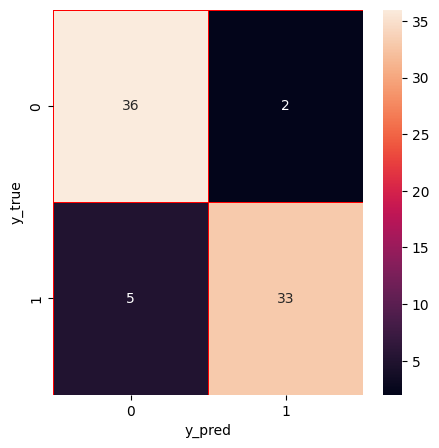

In [50]:
#Plotting a confusion matrix for checking the performance of our model

cm = confusion_matrix(y_test, y_pred_svc)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Logistic Regression Classifier

In [51]:
# Logistic Regression
LogisticRegressionModel = LogisticRegression(random_state = 42) #building model
LogisticRegressionModel.fit(X_train,y_train) #training model
y_pred_lr = LogisticRegressionModel.predict(X_test)
print("accuracy of Logistic Regression : {}".format(accuracy_score(y_test, y_pred_lr)))

accuracy of Logistic Regression : 0.9605263157894737


In [52]:
# Logistic Regression
LogisticRegressionModel = LogisticRegression(random_state = 42) #building model
LogisticRegressionModel.fit(X_train_scaled,y_train) #training model
y_pred_lr_sc = LogisticRegressionModel.predict(X_test_scaled)
print("accuracy of Logistic Regression : {}".format(accuracy_score(y_test, y_pred_lr_sc)))

accuracy of Logistic Regression : 0.9736842105263158


In [53]:
lr_accuracy_score = accuracy_score(y_test, y_pred_lr_sc)

In [54]:
print("Logistic Regression Report:\n",classification_report(y_test, y_pred_lr_sc))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        38
           1       0.97      0.97      0.97        38

    accuracy                           0.97        76
   macro avg       0.97      0.97      0.97        76
weighted avg       0.97      0.97      0.97        76



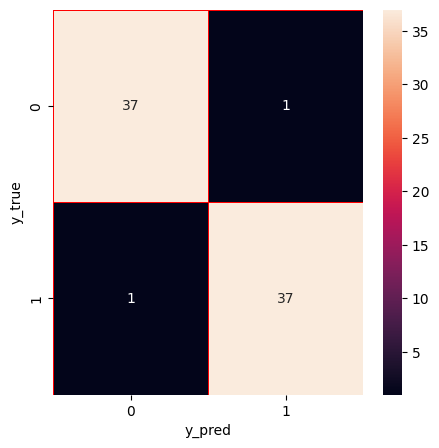

In [55]:
#Plotting a confusion matrix for checking the performance of our model
cm = confusion_matrix(y_test, y_pred_lr_sc)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Naive Bayes

In [56]:
nbModel = GaussianNB()       #building model
nbModel.fit(X_train,y_train) #training model
y_pred_nb = nbModel.predict(X_test)
print("accuracy of naive bayes : {}".format(accuracy_score(y_test, y_pred_nb)))

accuracy of naive bayes : 0.9736842105263158


In [57]:
nbModel = GaussianNB()       #building model
nbModel.fit(X_train_scaled,y_train) #training model
y_pred_nb_sc = nbModel.predict(X_test_scaled)
print("accuracy of naive bayes : {}".format(accuracy_score(y_test, y_pred_nb_sc)))

accuracy of naive bayes : 0.9473684210526315


In [58]:
nb_accuracy_score = accuracy_score(y_test, y_pred_nb)

In [59]:
print("naive bayes Report:\n",classification_report(y_test, y_pred_nb_sc))

naive bayes Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.97      0.92      0.95        38

    accuracy                           0.95        76
   macro avg       0.95      0.95      0.95        76
weighted avg       0.95      0.95      0.95        76



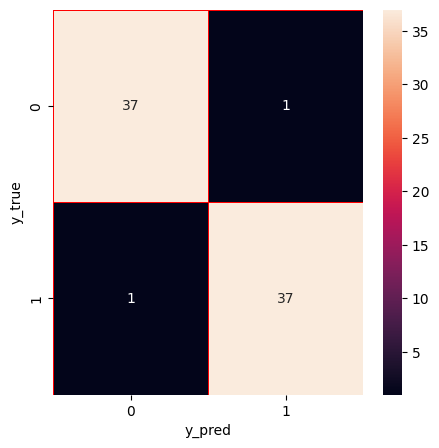

In [60]:
#Plotting a confusion matrix for checking the performance of our model
cm = confusion_matrix(y_test, y_pred_nb)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## Random Forest Classifier

In [61]:
RandomForestModel = RandomForestClassifier(n_estimators=10,random_state=42)
RandomForestModel.fit(X_train,y_train)
y_pred_rf = RandomForestModel.predict(X_test)
print("accuracy of Random Forest : {}".format(accuracy_score(y_test, y_pred_rf)))

accuracy of Random Forest : 0.9736842105263158


In [62]:
RandomForestModel = RandomForestClassifier(n_estimators=10,random_state=42)
RandomForestModel.fit(X_train_scaled,y_train)
y_pred_rf_sc = RandomForestModel.predict(X_test_scaled)
print("accuracy of Random Forest : {}".format(accuracy_score(y_test, y_pred_rf_sc)))

accuracy of Random Forest : 0.9736842105263158


In [63]:
rf_accuracy_score = accuracy_score(y_test, y_pred_rf_sc)

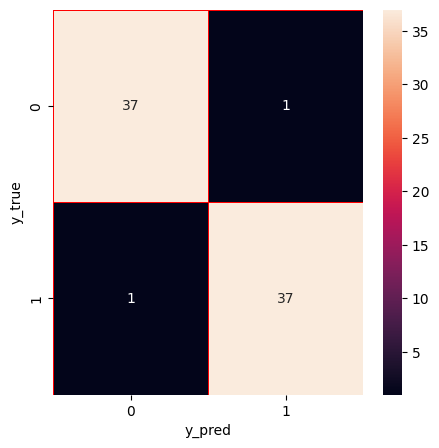

In [64]:
#Plotting a confusion matrix for checking the performance of our model
cm = confusion_matrix(y_test, y_pred_rf_sc)
#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

## XGBoost Classifier

In [65]:
#XGBoost Classifier
XGBModel = XGBClassifier(random_state = 42)
XGBModel.fit(X_train, y_train)
y_pred_xgb = XGBModel.predict(X_test)

print("accuracy of Logistic Regression : {}".format(accuracy_score(y_test, y_pred_xgb)))

accuracy of Logistic Regression : 0.9736842105263158


In [66]:
#XGBoost Classifier
XGBModel = XGBClassifier(random_state = 42)
XGBModel.fit(X_train_scaled, y_train)
y_pred_xgb_sc = XGBModel.predict(X_test_scaled)

print("accuracy of Logistic Regression : {}".format(accuracy_score(y_test, y_pred_xgb_sc)))

accuracy of Logistic Regression : 0.9736842105263158


In [67]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [68]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(XGBModel, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [69]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.7}

In [70]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [71]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(
    min_child_weight= 1,
    max_depth= 3,
     learning_rate= 0.25,
     gamma= 0.4,
     colsample_bytree= 0.7
)

xgb_classifier_pt.fit(X_train_scaled, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test_scaled)

In [72]:
xgb_accuracy_score= accuracy_score(y_test, y_pred_xgb_pt)
xgb_accuracy_score

0.9605263157894737

## Models Evaluation

In [73]:
Model_Evaluation = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest', 'XGBoost'],
                         'Accuracy': [lr_accuracy_score*100,nb_accuracy_score*100,svc_accuracy_score*100,dt_accuracy_score*100,rf_accuracy_score*100, xgb_accuracy_score * 100]})
Model_Evaluation

,Model,Accuracy
0,Logistic Regression,97.368421
1,Naive Bayes,97.368421
2,Support Vector Machine,97.368421
3,Decision Tree,89.473684
4,Random Forest,97.368421
5,XGBoost,96.052632


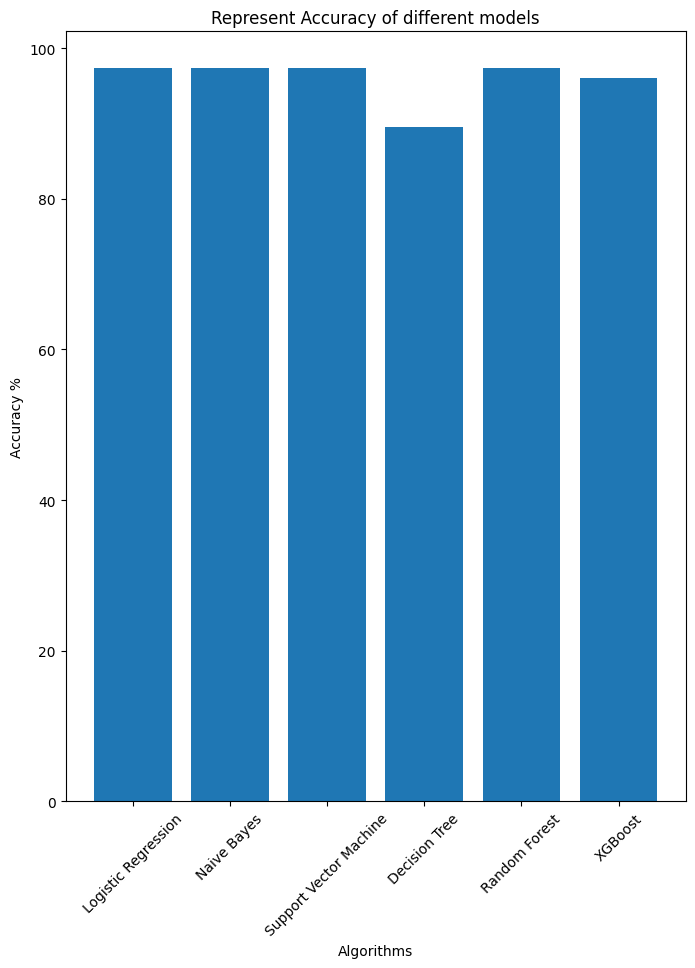

In [74]:
#Visualize
plt.figure(figsize=(8,10))
plt.title("Represent Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.bar(Model_Evaluation['Model'],Model_Evaluation['Accuracy'])
plt.show()

In [75]:
## New Lets Use Deep Learning

In [76]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [77]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [78]:
#Cancermodel1 : Simple Model

# Set the random seed
tf.random.set_seed(42)

# Create the model
Cancermodel = Sequential()
Cancermodel.add(Dense(512,activation='relu')) #Input layer (Number of features - 1(label))
Cancermodel.add(Dense(256,activation='selu'))
Cancermodel.add(Dense(1,activation='sigmoid')) #Output layer (Since it's a binary classification problem)

#Compile the model
#Using accuracy as loss function
Cancermodel.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

# Stop training when a monitored quantity has stopped improving
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True)

# Fit the model
historyCancermodel1 = Cancermodel.fit(X_train_scaled,y_train,
                                epochs=100,verbose=0,
                                validation_data=(X_test_scaled, y_test),
                                batch_size=64,
                                callbacks=[callback,
                                           # Add TensorBoard callback to model (callbacks parameter takes a list)
                                            create_tensorboard_callback(dir_name="tensorflow_hub_Cancermodel", # save experiment logs here
                                            experiment_name="Cancermodel1")] # name of log files
                                )

Saving TensorBoard log files to: tensorflow_hub_Cancermodel/Cancermodel1/20230707-183555


In [79]:
Cancermodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               15872     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 147,457
Trainable params: 147,457
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Evaluate model on the test dataset
Cancermodel.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.0722 - accuracy: 0.9868


[0.07218634337186813, 0.9868420958518982]

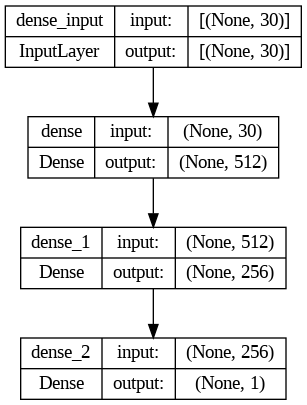

In [81]:
plot_model(Cancermodel, show_shapes=True)

Text(0.5, 0, 'epochs')

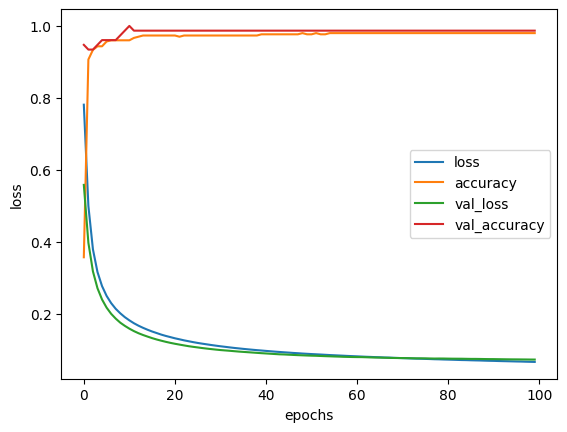

In [82]:
# plot history
import matplotlib.pyplot as plt
pd.DataFrame(historyCancermodel1.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [83]:
#Cancermodel2

# Set the random seed
tf.random.set_seed(42)

# Create the model
Cancermodel2 = Sequential()
Cancermodel2.add(Dense(1024,activation='relu')) #Input layer (Number of features - 1(label))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(512,activation='relu'))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(128,activation='relu'))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(64,activation='relu'))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(32,activation='relu'))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(2,activation='relu'))
Cancermodel2.add(Dropout(0.3))
Cancermodel2.add(Dense(1,activation='sigmoid')) #Output layer (Since it's a binary classification problem)

#Compile the model
#Using accuracy as loss function
Cancermodel2.compile(loss="binary_crossentropy",
                     optimizer=tf.keras.optimizers.SGD(),
                     metrics=["accuracy"])


# Stop training when a monitored quantity has stopped improving
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Fit the model
historyCancermodel2 = Cancermodel2.fit(X_train_scaled,y_train,
                                epochs=1000,verbose=0,
                                validation_data=(X_test_scaled, y_test),
                                batch_size=256,
                                callbacks=[callback,
                                           # Add TensorBoard callback to model (callbacks parameter takes a list)
                                            create_tensorboard_callback(dir_name="tensorflow_hub_Cancermodel", # save experiment logs here
                                            experiment_name="Cancermodel2")] # name of log files
                                )

Saving TensorBoard log files to: tensorflow_hub_Cancermodel/Cancermodel2/20230707-183609


In [84]:
Cancermodel2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1024)              31744     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [85]:
# Evaluate model on the test dataset
Cancermodel2.evaluate(X_test_scaled, y_test)

3/3 [==============================] - 0s 7ms/step - loss: 0.0673 - accuracy: 0.9868


[0.06725981086492538, 0.9868420958518982]

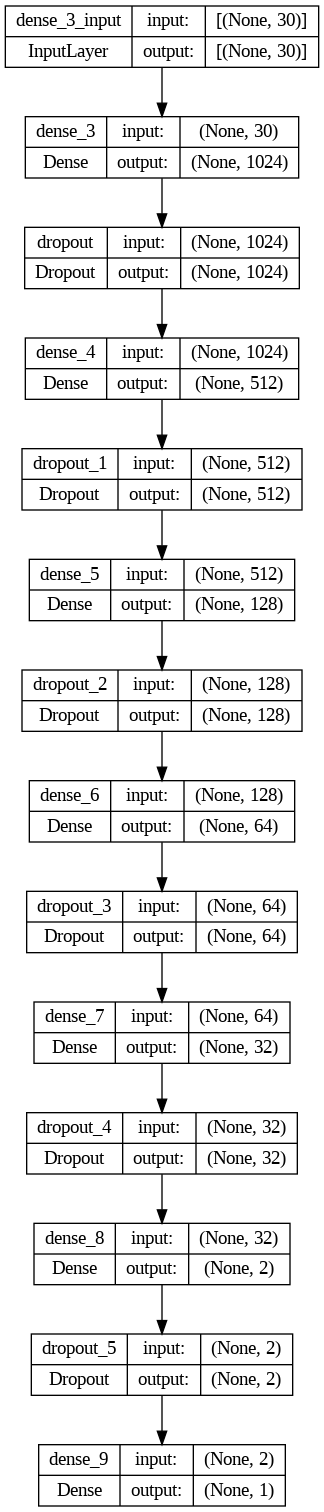

In [86]:
plot_model(Cancermodel2, show_shapes=True)

In [87]:
y_preds =  Cancermodel2.predict(X_test_scaled)

df_ev = np.round( pd.DataFrame(y_preds, columns=['Predicted']) )

# We can also include the Actual price column in that data frame (so we can manually compare them)
df_ev['Actual'] = y_test

df_ev.sample(7)


3/3 [==============================] - 0s 5ms/step


,Predicted,Actual
36,1.0,1
47,0.0,0
63,0.0,0
6,0.0,0
57,1.0,1
55,1.0,1
54,1.0,1


<div class="alert alert-block alert-info">
<p><b>Save trained model for future use</b>
<p>Write model to disk
</div>

In [88]:
from tensorflow.keras.models import save_model
if os.path.isfile('best_model.h5') is False:
    Cancermodel2.save('best_model.h5')

In [89]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub_WineType/ \
  --name "Breast Cancer Detection Models" \
  --description "Breast Cancer models architectures " \
  --one_shot

2023-07-07 18:37:35.536194: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub_WineType/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   VVS-WMS-QZC


./tensorflow_hub_WineType/: No such directory.
User specified `one_s

<div class="alert alert-block alert-success">
<p><b>  Arian Azmoudeh </b></p>
<p> https://www.linkedin.com/in/arianazmoudeh

</div>

<p>Thank you very much for your attention

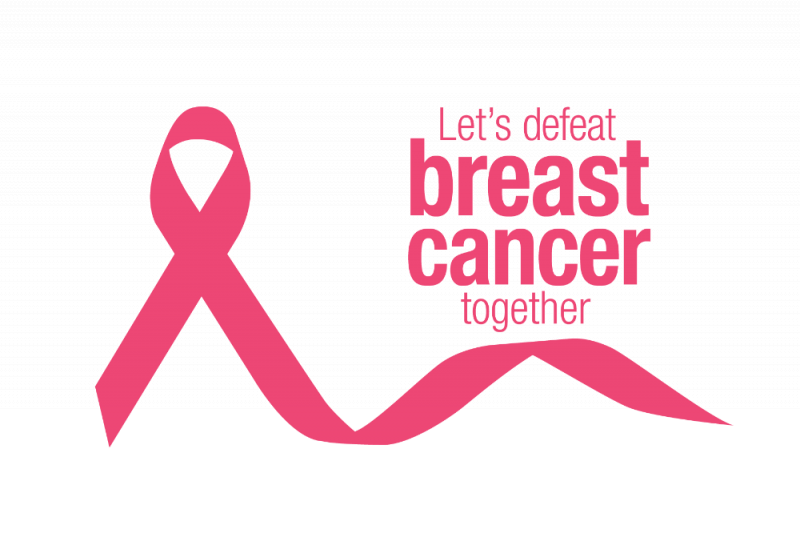